In [1]:
import data_handler
import configs
import train
from absl import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

logging.set_verbosity(logging.INFO)

### rotated MNIST dataset

In [3]:
n = 8
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist", n, n, bidirec=False)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1


Augmented training data


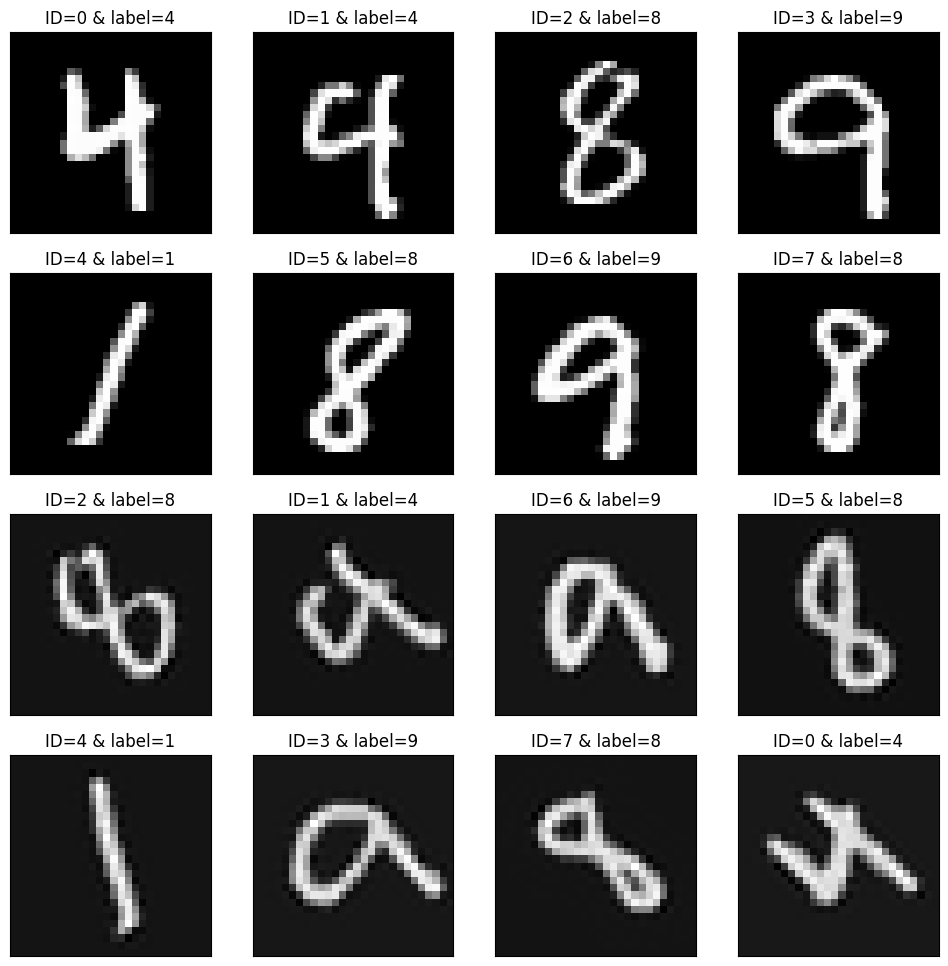

In [4]:
print("Augmented training data")
data_handler.show_img_grid([train_ds['image'][i] for i in range(2*n)],
                           [f'ID={train_ds["id"][i]} & label={train_ds["label"][i]}' for i in range(2*n)])

### CoRe penalty, fixed learning rate

#### D.5 a)

In [2]:
config = configs.mnist_experiment()
m = 1000
c = 100
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 1000 samples + 100 augmentations


INFO:absl:epoch: 1, train_loss: 1.4876, train_accuracy: 54.54, test1_accuracy: 31.15, test2_accuracy: 78.35, core_penalty: 1.0388
INFO:absl:epoch: 2, train_loss: 0.6581, train_accuracy: 82.78, test1_accuracy: 48.33, test2_accuracy: 88.38, core_penalty: 1.8655
INFO:absl:epoch: 3, train_loss: 0.4229, train_accuracy: 89.72, test1_accuracy: 52.57, test2_accuracy: 90.42, core_penalty: 1.1739
INFO:absl:epoch: 4, train_loss: 0.3230, train_accuracy: 93.61, test1_accuracy: 58.76, test2_accuracy: 90.96, core_penalty: 1.7083
INFO:absl:epoch: 5, train_loss: 0.2599, train_accuracy: 96.48, test1_accuracy: 59.67, test2_accuracy: 90.23, core_penalty: 5.0310
INFO:absl:epoch: 6, train_loss: 0.2108, train_accuracy: 97.96, test1_accuracy: 63.06, test2_accuracy: 92.24, core_penalty: 5.3905
INFO:absl:epoch: 7, train_loss: 0.1698, train_accuracy: 99.54, test1_accuracy: 64.58, test2_accuracy: 91.82, core_penalty: 8.7407
INFO:absl:epoch: 8, train_loss: 0.1551, train_accuracy: 99.54, test1_accuracy: 64.95, test



 CoRe model: 1000 samples + 100 augmentations


INFO:absl:epoch: 1, train_loss: 1.5604, train_accuracy: 55.19, test1_accuracy: 42.44, test2_accuracy: 78.87, core_penalty: 0.5745
INFO:absl:epoch: 2, train_loss: 0.8105, train_accuracy: 82.22, test1_accuracy: 53.72, test2_accuracy: 85.92, core_penalty: 0.4613
INFO:absl:epoch: 3, train_loss: 0.5486, train_accuracy: 88.61, test1_accuracy: 55.77, test2_accuracy: 88.02, core_penalty: 0.4824
INFO:absl:epoch: 4, train_loss: 0.5031, train_accuracy: 92.78, test1_accuracy: 62.81, test2_accuracy: 89.14, core_penalty: 0.4012
INFO:absl:epoch: 5, train_loss: 0.4976, train_accuracy: 93.98, test1_accuracy: 64.89, test2_accuracy: 91.18, core_penalty: 0.6070
INFO:absl:epoch: 6, train_loss: 0.4204, train_accuracy: 96.30, test1_accuracy: 67.53, test2_accuracy: 92.51, core_penalty: 0.5408
INFO:absl:epoch: 7, train_loss: 0.4591, train_accuracy: 97.31, test1_accuracy: 68.12, test2_accuracy: 92.34, core_penalty: 0.8269
INFO:absl:epoch: 8, train_loss: 0.4436, train_accuracy: 97.31, test1_accuracy: 69.62, test

In [3]:
config = configs.mnist_experiment()
m = 1000
c = 200
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 1000 samples + 200 augmentations


INFO:absl:epoch: 1, train_loss: 1.5819, train_accuracy: 52.17, test1_accuracy: 41.98, test2_accuracy: 79.95, core_penalty: 0.9887
INFO:absl:epoch: 2, train_loss: 0.6897, train_accuracy: 82.83, test1_accuracy: 64.69, test2_accuracy: 87.55, core_penalty: 1.1164
INFO:absl:epoch: 3, train_loss: 0.4377, train_accuracy: 90.08, test1_accuracy: 70.46, test2_accuracy: 91.34, core_penalty: 0.9552
INFO:absl:epoch: 4, train_loss: 0.3093, train_accuracy: 94.67, test1_accuracy: 74.84, test2_accuracy: 91.27, core_penalty: 3.4056
INFO:absl:epoch: 5, train_loss: 0.2340, train_accuracy: 97.42, test1_accuracy: 76.18, test2_accuracy: 92.67, core_penalty: 3.1893
INFO:absl:epoch: 6, train_loss: 0.1848, train_accuracy: 99.08, test1_accuracy: 75.05, test2_accuracy: 92.53, core_penalty: 6.3337
INFO:absl:epoch: 7, train_loss: 0.1672, train_accuracy: 99.42, test1_accuracy: 74.42, test2_accuracy: 92.57, core_penalty: 4.8935
INFO:absl:epoch: 8, train_loss: 0.1557, train_accuracy: 99.83, test1_accuracy: 73.89, test



 CoRe model: 1000 samples + 200 augmentations


INFO:absl:epoch: 1, train_loss: 1.6695, train_accuracy: 52.25, test1_accuracy: 48.90, test2_accuracy: 77.91, core_penalty: 0.5549
INFO:absl:epoch: 2, train_loss: 0.8498, train_accuracy: 81.83, test1_accuracy: 63.62, test2_accuracy: 87.66, core_penalty: 0.4068
INFO:absl:epoch: 3, train_loss: 0.5594, train_accuracy: 89.92, test1_accuracy: 70.40, test2_accuracy: 90.56, core_penalty: 0.4588
INFO:absl:epoch: 4, train_loss: 0.4933, train_accuracy: 94.25, test1_accuracy: 76.64, test2_accuracy: 91.40, core_penalty: 0.5096
INFO:absl:epoch: 5, train_loss: 0.4039, train_accuracy: 96.50, test1_accuracy: 77.30, test2_accuracy: 91.85, core_penalty: 0.4855
INFO:absl:epoch: 6, train_loss: 0.4725, train_accuracy: 96.67, test1_accuracy: 74.28, test2_accuracy: 90.70, core_penalty: 0.8189
INFO:absl:epoch: 7, train_loss: 0.5104, train_accuracy: 95.75, test1_accuracy: 72.23, test2_accuracy: 91.49, core_penalty: 0.5793
INFO:absl:epoch: 8, train_loss: 0.4542, train_accuracy: 96.25, test1_accuracy: 74.15, test

In [4]:
config = configs.mnist_experiment()
m = 1000
c = 500
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 1000 samples + 500 augmentations


INFO:absl:epoch: 1, train_loss: 1.5474, train_accuracy: 50.63, test1_accuracy: 61.98, test2_accuracy: 77.88, core_penalty: 0.4389
INFO:absl:epoch: 2, train_loss: 0.7075, train_accuracy: 80.56, test1_accuracy: 76.25, test2_accuracy: 87.43, core_penalty: 1.1449
INFO:absl:epoch: 3, train_loss: 0.4949, train_accuracy: 87.85, test1_accuracy: 80.53, test2_accuracy: 90.28, core_penalty: 1.5230
INFO:absl:epoch: 4, train_loss: 0.3289, train_accuracy: 94.58, test1_accuracy: 84.10, test2_accuracy: 91.60, core_penalty: 2.5633
INFO:absl:epoch: 5, train_loss: 0.2610, train_accuracy: 96.67, test1_accuracy: 82.93, test2_accuracy: 91.24, core_penalty: 3.3750
INFO:absl:epoch: 6, train_loss: 0.2118, train_accuracy: 97.92, test1_accuracy: 85.27, test2_accuracy: 92.28, core_penalty: 3.4556
INFO:absl:epoch: 7, train_loss: 0.1809, train_accuracy: 99.10, test1_accuracy: 85.45, test2_accuracy: 92.01, core_penalty: 4.5846
INFO:absl:epoch: 8, train_loss: 0.1781, train_accuracy: 99.03, test1_accuracy: 84.95, test



 CoRe model: 1000 samples + 500 augmentations


INFO:absl:epoch: 1, train_loss: 1.6075, train_accuracy: 50.07, test1_accuracy: 65.57, test2_accuracy: 76.46, core_penalty: 0.2579
INFO:absl:epoch: 2, train_loss: 0.8673, train_accuracy: 80.14, test1_accuracy: 75.26, test2_accuracy: 88.00, core_penalty: 0.5101
INFO:absl:epoch: 3, train_loss: 0.6489, train_accuracy: 87.36, test1_accuracy: 82.78, test2_accuracy: 90.74, core_penalty: 0.4935
INFO:absl:epoch: 4, train_loss: 0.5128, train_accuracy: 93.26, test1_accuracy: 83.80, test2_accuracy: 91.89, core_penalty: 0.6269
INFO:absl:epoch: 5, train_loss: 0.4716, train_accuracy: 95.83, test1_accuracy: 87.26, test2_accuracy: 92.93, core_penalty: 0.5016
INFO:absl:epoch: 6, train_loss: 0.4410, train_accuracy: 96.60, test1_accuracy: 86.35, test2_accuracy: 92.20, core_penalty: 0.6302
INFO:absl:epoch: 7, train_loss: 0.4261, train_accuracy: 96.53, test1_accuracy: 86.46, test2_accuracy: 92.26, core_penalty: 0.4573
INFO:absl:epoch: 8, train_loss: 0.4056, train_accuracy: 98.06, test1_accuracy: 87.85, test

In [5]:
config = configs.mnist_experiment()
m = 1000
c = 1000
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 1000 samples + 1000 augmentations


INFO:absl:epoch: 1, train_loss: 1.3243, train_accuracy: 57.60, test1_accuracy: 79.53, test2_accuracy: 83.27, core_penalty: 0.6912
INFO:absl:epoch: 2, train_loss: 0.5636, train_accuracy: 85.36, test1_accuracy: 86.22, test2_accuracy: 89.16, core_penalty: 1.5091
INFO:absl:epoch: 3, train_loss: 0.4018, train_accuracy: 91.56, test1_accuracy: 87.27, test2_accuracy: 90.54, core_penalty: 2.2996
INFO:absl:epoch: 4, train_loss: 0.3050, train_accuracy: 94.32, test1_accuracy: 87.73, test2_accuracy: 90.03, core_penalty: 2.4045
INFO:absl:epoch: 5, train_loss: 0.2674, train_accuracy: 95.57, test1_accuracy: 88.62, test2_accuracy: 90.62, core_penalty: 3.4449
INFO:absl:epoch: 6, train_loss: 0.2435, train_accuracy: 96.98, test1_accuracy: 89.61, test2_accuracy: 89.92, core_penalty: 3.1069
INFO:absl:epoch: 7, train_loss: 0.2250, train_accuracy: 97.29, test1_accuracy: 88.85, test2_accuracy: 90.40, core_penalty: 3.3941
INFO:absl:epoch: 8, train_loss: 0.2193, train_accuracy: 97.60, test1_accuracy: 90.28, test



 CoRe model: 1000 samples + 1000 augmentations


INFO:absl:epoch: 1, train_loss: 1.3978, train_accuracy: 57.92, test1_accuracy: 78.13, test2_accuracy: 82.12, core_penalty: 0.3532
INFO:absl:epoch: 2, train_loss: 0.7417, train_accuracy: 84.95, test1_accuracy: 85.65, test2_accuracy: 88.28, core_penalty: 0.6202
INFO:absl:epoch: 3, train_loss: 0.5713, train_accuracy: 91.72, test1_accuracy: 88.69, test2_accuracy: 90.68, core_penalty: 0.5614
INFO:absl:epoch: 4, train_loss: 0.4560, train_accuracy: 94.64, test1_accuracy: 90.04, test2_accuracy: 91.69, core_penalty: 0.4423
INFO:absl:epoch: 5, train_loss: 0.4577, train_accuracy: 94.84, test1_accuracy: 90.48, test2_accuracy: 91.25, core_penalty: 0.5429
INFO:absl:epoch: 6, train_loss: 0.4269, train_accuracy: 96.15, test1_accuracy: 90.51, test2_accuracy: 92.22, core_penalty: 0.4440
INFO:absl:epoch: 7, train_loss: 0.3711, train_accuracy: 96.98, test1_accuracy: 92.07, test2_accuracy: 92.26, core_penalty: 0.4015
INFO:absl:epoch: 8, train_loss: 0.4000, train_accuracy: 97.76, test1_accuracy: 91.87, test

#### D.5 b)

In [6]:
config = configs.mnist_experiment()
m = 10000
c = 100
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 10000 samples + 100 augmentations


INFO:absl:epoch: 1, train_loss: 0.5636, train_accuracy: 87.06, test1_accuracy: 47.16, test2_accuracy: 95.61, core_penalty: 0.3815
INFO:absl:epoch: 2, train_loss: 0.2770, train_accuracy: 95.37, test1_accuracy: 60.25, test2_accuracy: 96.79, core_penalty: 0.1153
INFO:absl:epoch: 3, train_loss: 0.2299, train_accuracy: 96.53, test1_accuracy: 56.33, test2_accuracy: 96.49, core_penalty: 0.0504
INFO:absl:epoch: 4, train_loss: 0.2205, train_accuracy: 96.81, test1_accuracy: 61.20, test2_accuracy: 96.67, core_penalty: 0.0426
INFO:absl:epoch: 5, train_loss: 0.2101, train_accuracy: 97.09, test1_accuracy: 64.93, test2_accuracy: 97.29, core_penalty: 0.0000
INFO:absl:epoch: 6, train_loss: 0.1973, train_accuracy: 97.16, test1_accuracy: 59.10, test2_accuracy: 97.23, core_penalty: 0.0301
INFO:absl:epoch: 7, train_loss: 0.2070, train_accuracy: 97.11, test1_accuracy: 61.22, test2_accuracy: 97.23, core_penalty: 0.0000
INFO:absl:epoch: 8, train_loss: 0.1970, train_accuracy: 97.41, test1_accuracy: 63.26, test



 CoRe model: 10000 samples + 100 augmentations


INFO:absl:epoch: 1, train_loss: 0.6547, train_accuracy: 86.16, test1_accuracy: 45.22, test2_accuracy: 94.12, core_penalty: 0.2458
INFO:absl:epoch: 2, train_loss: 0.3254, train_accuracy: 94.80, test1_accuracy: 57.03, test2_accuracy: 96.35, core_penalty: 0.0562
INFO:absl:epoch: 3, train_loss: 0.2827, train_accuracy: 95.98, test1_accuracy: 53.11, test2_accuracy: 95.94, core_penalty: 0.0559
INFO:absl:epoch: 4, train_loss: 0.2653, train_accuracy: 96.43, test1_accuracy: 61.61, test2_accuracy: 97.06, core_penalty: 0.0394
INFO:absl:epoch: 5, train_loss: 0.2132, train_accuracy: 97.06, test1_accuracy: 66.21, test2_accuracy: 97.31, core_penalty: 0.0000
INFO:absl:epoch: 6, train_loss: 0.2136, train_accuracy: 97.05, test1_accuracy: 57.87, test2_accuracy: 96.77, core_penalty: 0.0220
INFO:absl:epoch: 7, train_loss: 0.2088, train_accuracy: 97.22, test1_accuracy: 56.34, test2_accuracy: 97.09, core_penalty: 0.0000
INFO:absl:epoch: 8, train_loss: 0.2081, train_accuracy: 97.38, test1_accuracy: 61.45, test

In [7]:
config = configs.mnist_experiment()
m = 10000
c = 200
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 10000 samples + 200 augmentations


INFO:absl:epoch: 1, train_loss: 0.5627, train_accuracy: 86.43, test1_accuracy: 59.64, test2_accuracy: 96.27, core_penalty: 0.1314
INFO:absl:epoch: 2, train_loss: 0.2722, train_accuracy: 95.39, test1_accuracy: 67.38, test2_accuracy: 96.31, core_penalty: 0.0762
INFO:absl:epoch: 3, train_loss: 0.2380, train_accuracy: 96.36, test1_accuracy: 66.63, test2_accuracy: 96.45, core_penalty: 0.1199
INFO:absl:epoch: 4, train_loss: 0.2267, train_accuracy: 96.54, test1_accuracy: 67.95, test2_accuracy: 97.15, core_penalty: 0.2437
INFO:absl:epoch: 5, train_loss: 0.2115, train_accuracy: 97.09, test1_accuracy: 70.30, test2_accuracy: 96.30, core_penalty: 0.1014
INFO:absl:epoch: 6, train_loss: 0.2085, train_accuracy: 97.09, test1_accuracy: 66.96, test2_accuracy: 97.03, core_penalty: 0.0443
INFO:absl:epoch: 7, train_loss: 0.2014, train_accuracy: 97.35, test1_accuracy: 67.69, test2_accuracy: 97.01, core_penalty: 0.0000
INFO:absl:epoch: 8, train_loss: 0.1956, train_accuracy: 97.60, test1_accuracy: 68.62, test



 CoRe model: 10000 samples + 200 augmentations


INFO:absl:epoch: 1, train_loss: 0.6303, train_accuracy: 85.95, test1_accuracy: 47.00, test2_accuracy: 95.05, core_penalty: 0.1526
INFO:absl:epoch: 2, train_loss: 0.3331, train_accuracy: 95.04, test1_accuracy: 64.33, test2_accuracy: 96.97, core_penalty: 0.0503
INFO:absl:epoch: 3, train_loss: 0.3273, train_accuracy: 95.61, test1_accuracy: 65.01, test2_accuracy: 96.67, core_penalty: 0.1105
INFO:absl:epoch: 4, train_loss: 0.3271, train_accuracy: 95.77, test1_accuracy: 66.21, test2_accuracy: 95.87, core_penalty: 0.1596
INFO:absl:epoch: 5, train_loss: 0.2809, train_accuracy: 96.67, test1_accuracy: 71.00, test2_accuracy: 97.18, core_penalty: 0.0769
INFO:absl:epoch: 6, train_loss: 0.2737, train_accuracy: 96.46, test1_accuracy: 72.88, test2_accuracy: 97.36, core_penalty: 0.0406
INFO:absl:epoch: 7, train_loss: 0.1994, train_accuracy: 97.77, test1_accuracy: 70.98, test2_accuracy: 97.39, core_penalty: 0.0000
INFO:absl:epoch: 8, train_loss: 0.2047, train_accuracy: 97.38, test1_accuracy: 64.57, test

In [8]:
config = configs.mnist_experiment()
m = 10000
c = 500
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 10000 samples + 500 augmentations


INFO:absl:epoch: 1, train_loss: 0.5696, train_accuracy: 86.02, test1_accuracy: 72.52, test2_accuracy: 94.89, core_penalty: 0.0557
INFO:absl:epoch: 2, train_loss: 0.2947, train_accuracy: 95.09, test1_accuracy: 78.30, test2_accuracy: 95.89, core_penalty: 0.2085
INFO:absl:epoch: 3, train_loss: 0.2542, train_accuracy: 95.92, test1_accuracy: 80.20, test2_accuracy: 95.85, core_penalty: 0.1146
INFO:absl:epoch: 4, train_loss: 0.2411, train_accuracy: 96.69, test1_accuracy: 81.28, test2_accuracy: 96.19, core_penalty: 0.0207
INFO:absl:epoch: 5, train_loss: 0.2348, train_accuracy: 96.62, test1_accuracy: 80.58, test2_accuracy: 95.79, core_penalty: 0.0855
INFO:absl:epoch: 6, train_loss: 0.2298, train_accuracy: 96.78, test1_accuracy: 79.97, test2_accuracy: 96.63, core_penalty: 0.0992
INFO:absl:epoch: 7, train_loss: 0.2235, train_accuracy: 97.12, test1_accuracy: 79.74, test2_accuracy: 96.69, core_penalty: 0.2687
INFO:absl:epoch: 8, train_loss: 0.2193, train_accuracy: 97.26, test1_accuracy: 80.01, test



 CoRe model: 10000 samples + 500 augmentations


INFO:absl:epoch: 1, train_loss: 0.5901, train_accuracy: 85.84, test1_accuracy: 72.20, test2_accuracy: 95.77, core_penalty: 0.0491
INFO:absl:epoch: 2, train_loss: 0.3961, train_accuracy: 94.10, test1_accuracy: 76.78, test2_accuracy: 94.52, core_penalty: 0.2063
INFO:absl:epoch: 3, train_loss: 0.3641, train_accuracy: 95.19, test1_accuracy: 80.45, test2_accuracy: 95.94, core_penalty: 0.1229
INFO:absl:epoch: 4, train_loss: 0.2821, train_accuracy: 96.50, test1_accuracy: 79.56, test2_accuracy: 95.89, core_penalty: 0.0240
INFO:absl:epoch: 5, train_loss: 0.3071, train_accuracy: 95.79, test1_accuracy: 80.43, test2_accuracy: 96.06, core_penalty: 0.1051
INFO:absl:epoch: 6, train_loss: 0.2878, train_accuracy: 96.35, test1_accuracy: 79.30, test2_accuracy: 96.22, core_penalty: 0.0665
INFO:absl:epoch: 7, train_loss: 0.4568, train_accuracy: 94.33, test1_accuracy: 78.36, test2_accuracy: 95.88, core_penalty: 0.3170
INFO:absl:epoch: 8, train_loss: 0.3923, train_accuracy: 95.67, test1_accuracy: 79.91, test

In [9]:
config = configs.mnist_experiment()
m = 10000
c = 1000
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 10000 samples + 1000 augmentations


INFO:absl:epoch: 1, train_loss: 0.5770, train_accuracy: 86.24, test1_accuracy: 82.31, test2_accuracy: 95.28, core_penalty: 0.1565
INFO:absl:epoch: 2, train_loss: 0.3211, train_accuracy: 94.61, test1_accuracy: 83.12, test2_accuracy: 95.69, core_penalty: 0.2346
INFO:absl:epoch: 3, train_loss: 0.2853, train_accuracy: 95.38, test1_accuracy: 87.31, test2_accuracy: 96.96, core_penalty: 0.2370
INFO:absl:epoch: 4, train_loss: 0.2632, train_accuracy: 96.09, test1_accuracy: 86.37, test2_accuracy: 97.27, core_penalty: 0.1672
INFO:absl:epoch: 5, train_loss: 0.2557, train_accuracy: 96.27, test1_accuracy: 88.81, test2_accuracy: 96.87, core_penalty: 0.1431
INFO:absl:epoch: 6, train_loss: 0.2469, train_accuracy: 96.66, test1_accuracy: 86.64, test2_accuracy: 97.07, core_penalty: 0.1401
INFO:absl:epoch: 7, train_loss: 0.2479, train_accuracy: 96.36, test1_accuracy: 85.93, test2_accuracy: 96.63, core_penalty: 0.2598
INFO:absl:epoch: 8, train_loss: 0.2412, train_accuracy: 96.88, test1_accuracy: 84.00, test



 CoRe model: 10000 samples + 1000 augmentations


INFO:absl:epoch: 1, train_loss: 0.6396, train_accuracy: 85.66, test1_accuracy: 76.45, test2_accuracy: 94.32, core_penalty: 0.1364
INFO:absl:epoch: 2, train_loss: 0.4484, train_accuracy: 93.38, test1_accuracy: 78.19, test2_accuracy: 95.91, core_penalty: 0.2152
INFO:absl:epoch: 3, train_loss: 0.4054, train_accuracy: 94.87, test1_accuracy: 85.21, test2_accuracy: 96.71, core_penalty: 0.1705
INFO:absl:epoch: 4, train_loss: 0.3472, train_accuracy: 95.56, test1_accuracy: 85.43, test2_accuracy: 96.94, core_penalty: 0.0986
INFO:absl:epoch: 5, train_loss: 0.3473, train_accuracy: 95.98, test1_accuracy: 83.55, test2_accuracy: 96.44, core_penalty: 0.1645
INFO:absl:epoch: 6, train_loss: 0.3432, train_accuracy: 96.12, test1_accuracy: 86.77, test2_accuracy: 96.77, core_penalty: 0.1378
INFO:absl:epoch: 7, train_loss: 0.3567, train_accuracy: 95.99, test1_accuracy: 87.22, test2_accuracy: 96.90, core_penalty: 0.1717
INFO:absl:epoch: 8, train_loss: 0.3263, train_accuracy: 96.22, test1_accuracy: 87.10, test

In [10]:
config = configs.mnist_experiment()
m = 10000
c = 2000
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 10000 samples + 2000 augmentations


INFO:absl:epoch: 1, train_loss: 0.5663, train_accuracy: 86.33, test1_accuracy: 85.56, test2_accuracy: 94.43, core_penalty: 0.5265
INFO:absl:epoch: 2, train_loss: 0.3116, train_accuracy: 94.73, test1_accuracy: 84.23, test2_accuracy: 95.28, core_penalty: 0.3185
INFO:absl:epoch: 3, train_loss: 0.2868, train_accuracy: 95.40, test1_accuracy: 89.55, test2_accuracy: 95.96, core_penalty: 0.5987
INFO:absl:epoch: 4, train_loss: 0.2664, train_accuracy: 96.07, test1_accuracy: 89.57, test2_accuracy: 96.69, core_penalty: 0.4242
INFO:absl:epoch: 5, train_loss: 0.2611, train_accuracy: 96.27, test1_accuracy: 88.86, test2_accuracy: 96.65, core_penalty: 0.5841
INFO:absl:epoch: 6, train_loss: 0.2507, train_accuracy: 96.27, test1_accuracy: 89.83, test2_accuracy: 95.51, core_penalty: 0.3973
INFO:absl:epoch: 7, train_loss: 0.2475, train_accuracy: 96.70, test1_accuracy: 90.17, test2_accuracy: 96.53, core_penalty: 0.1854
INFO:absl:epoch: 8, train_loss: 0.2425, train_accuracy: 96.63, test1_accuracy: 89.73, test



 CoRe model: 10000 samples + 2000 augmentations


INFO:absl:epoch: 1, train_loss: 0.6783, train_accuracy: 85.33, test1_accuracy: 86.18, test2_accuracy: 94.85, core_penalty: 0.3330
INFO:absl:epoch: 2, train_loss: 0.4288, train_accuracy: 93.71, test1_accuracy: 87.85, test2_accuracy: 96.15, core_penalty: 0.2068
INFO:absl:epoch: 3, train_loss: 0.4270, train_accuracy: 94.70, test1_accuracy: 88.11, test2_accuracy: 94.52, core_penalty: 0.2877
INFO:absl:epoch: 4, train_loss: 0.3993, train_accuracy: 95.23, test1_accuracy: 89.14, test2_accuracy: 96.45, core_penalty: 0.2098
INFO:absl:epoch: 5, train_loss: 0.4061, train_accuracy: 95.47, test1_accuracy: 89.66, test2_accuracy: 95.96, core_penalty: 0.2884
INFO:absl:epoch: 6, train_loss: 0.3791, train_accuracy: 95.81, test1_accuracy: 89.78, test2_accuracy: 95.38, core_penalty: 0.2163
INFO:absl:epoch: 7, train_loss: 0.3494, train_accuracy: 95.76, test1_accuracy: 90.74, test2_accuracy: 96.82, core_penalty: 0.1071
INFO:absl:epoch: 8, train_loss: 0.3846, train_accuracy: 96.01, test1_accuracy: 89.74, test

In [11]:
config = configs.mnist_experiment()
m = 10000
c = 5000
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 10000 samples + 5000 augmentations


INFO:absl:epoch: 1, train_loss: 0.5709, train_accuracy: 86.23, test1_accuracy: 91.00, test2_accuracy: 95.27, core_penalty: 0.5792
INFO:absl:epoch: 2, train_loss: 0.3266, train_accuracy: 94.51, test1_accuracy: 92.29, test2_accuracy: 95.57, core_penalty: 0.5260
INFO:absl:epoch: 3, train_loss: 0.3014, train_accuracy: 95.03, test1_accuracy: 93.29, test2_accuracy: 95.55, core_penalty: 0.5422
INFO:absl:epoch: 4, train_loss: 0.2954, train_accuracy: 95.45, test1_accuracy: 93.63, test2_accuracy: 94.96, core_penalty: 0.4152
INFO:absl:epoch: 5, train_loss: 0.2820, train_accuracy: 95.73, test1_accuracy: 91.73, test2_accuracy: 96.38, core_penalty: 0.6195
INFO:absl:epoch: 6, train_loss: 0.2754, train_accuracy: 96.02, test1_accuracy: 93.18, test2_accuracy: 96.32, core_penalty: 0.7270
INFO:absl:epoch: 7, train_loss: 0.2724, train_accuracy: 96.18, test1_accuracy: 92.38, test2_accuracy: 96.43, core_penalty: 0.6733
INFO:absl:epoch: 8, train_loss: 0.2764, train_accuracy: 95.90, test1_accuracy: 93.45, test



 CoRe model: 10000 samples + 5000 augmentations


INFO:absl:epoch: 1, train_loss: 0.6947, train_accuracy: 85.44, test1_accuracy: 89.44, test2_accuracy: 93.98, core_penalty: 0.3197
INFO:absl:epoch: 2, train_loss: 0.4684, train_accuracy: 93.71, test1_accuracy: 92.08, test2_accuracy: 95.48, core_penalty: 0.2742
INFO:absl:epoch: 3, train_loss: 0.4577, train_accuracy: 94.58, test1_accuracy: 92.93, test2_accuracy: 96.03, core_penalty: 0.3049
INFO:absl:epoch: 4, train_loss: 0.4334, train_accuracy: 94.95, test1_accuracy: 90.62, test2_accuracy: 95.39, core_penalty: 0.2799
INFO:absl:epoch: 5, train_loss: 0.4617, train_accuracy: 94.94, test1_accuracy: 92.37, test2_accuracy: 95.93, core_penalty: 0.3458
INFO:absl:epoch: 6, train_loss: 0.4435, train_accuracy: 95.19, test1_accuracy: 92.28, test2_accuracy: 95.91, core_penalty: 0.3130
INFO:absl:epoch: 7, train_loss: 0.4336, train_accuracy: 95.08, test1_accuracy: 93.40, test2_accuracy: 95.95, core_penalty: 0.3112
INFO:absl:epoch: 8, train_loss: 0.3668, train_accuracy: 95.85, test1_accuracy: 92.77, test

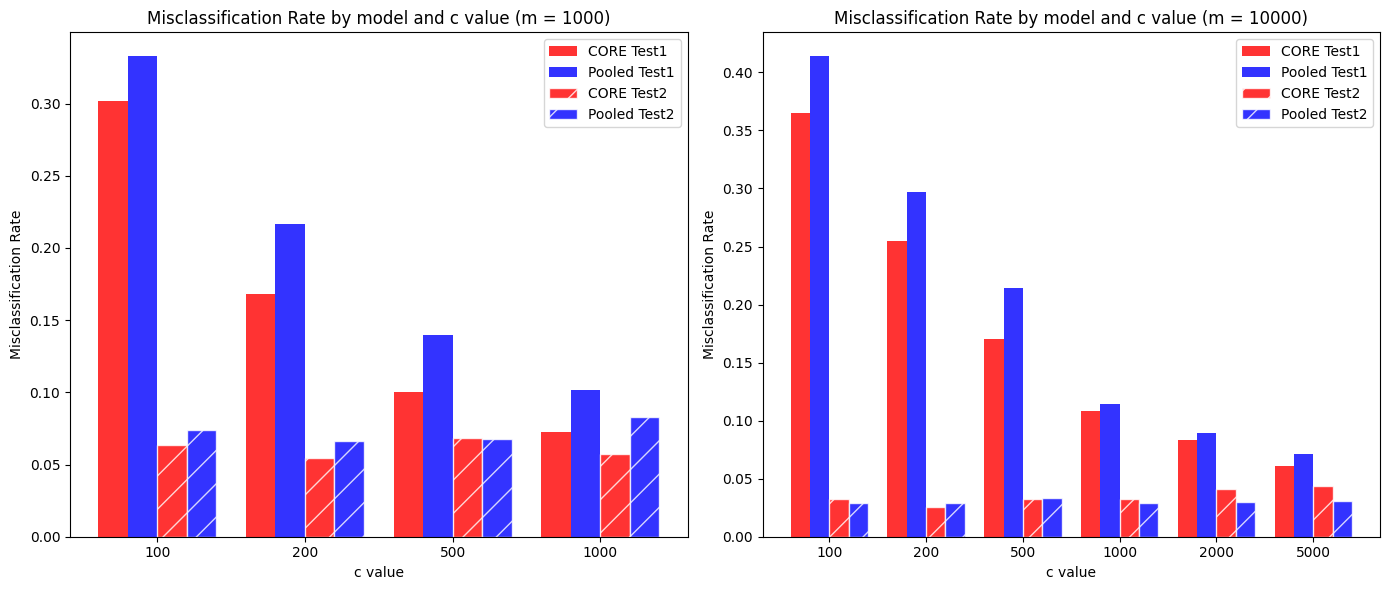

In [4]:
data = []
with open('models/misclass_rates_models.txt', 'r') as file:
    for line in file.readlines():
        parts = line.split(', ')
        model = parts[0].split('_')
        model_name = model[1]
        m = int(model[2])
        c = int(model[3])
        test1_misclass = float(parts[1].split(': ')[1])
        test2_misclass = float(parts[2].split(': ')[1])
        data.append([model_name, m, c, test1_misclass, test2_misclass])

df = pd.DataFrame(data, columns=['Model', 'm', 'c', 'Test1', 'Test2'])
df['Model'] = df['Model'].replace({'core': 'pooled', 'pooled': 'core'})  # Mistake in the file

df_pivot = df.pivot_table(index=['m', 'c'], columns='Model', values=['Test1', 'Test2']).reset_index()
df_pivot.columns = ['m', 'c', 'Core_Test1', 'Pooled_Test1', 'Core_Test2', 'Pooled_Test2']

def plot_bars(df, m_value, ax):
    subset = df[df['m'] == m_value]

    bar_width = 0.2
    index = np.arange(len(subset))
    opacity = 0.8

    rects1 = ax.bar(index - bar_width, subset['Core_Test1'], bar_width, alpha=opacity, color='red', label='CORE Test1')
    rects2 = ax.bar(index, subset['Pooled_Test1'], bar_width, alpha=opacity, color='blue', label='Pooled Test1')
    rects3 = ax.bar(index + bar_width, subset['Core_Test2'], bar_width, alpha=opacity, color='red', edgecolor='white', hatch='/', label='CORE Test2')
    rects4 = ax.bar(index + 2 * bar_width, subset['Pooled_Test2'], bar_width, alpha=opacity, color='blue', edgecolor='white', hatch='/', label='Pooled Test2')

    ax.set_xlabel('c value')
    ax.set_ylabel('Misclassification Rate')
    ax.set_title(f'Misclassification Rate by model and c value (m = {m_value})')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(subset['c'])
    ax.legend()

fig, axs = plt.subplots(1, len(df['m'].unique()), figsize=(14, 6))

for i, m_val in enumerate(df['m'].unique()):
    plot_bars(df_pivot, m_val, axs[i])

plt.tight_layout()
plt.show()


#### Decaying learning rate

In [3]:
# Q: better than 66 vs 69?
config = configs.mnist_experiment()
m = 1000
c = 100
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_decay/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_decay/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 1000 samples + 100 augmentations


INFO:absl:epoch: 1, train_loss: 1.5535, train_accuracy: 51.20, test1_accuracy: 28.56, test2_accuracy: 82.88, core_penalty: 0.1696
INFO:absl:epoch: 2, train_loss: 0.6808, train_accuracy: 81.67, test1_accuracy: 50.39, test2_accuracy: 88.39, core_penalty: 0.9260
INFO:absl:epoch: 3, train_loss: 0.4329, train_accuracy: 90.00, test1_accuracy: 57.81, test2_accuracy: 90.00, core_penalty: 3.1289
INFO:absl:epoch: 4, train_loss: 0.2941, train_accuracy: 95.09, test1_accuracy: 68.37, test2_accuracy: 92.22, core_penalty: 2.0229
INFO:absl:epoch: 5, train_loss: 0.2212, train_accuracy: 97.69, test1_accuracy: 69.33, test2_accuracy: 92.34, core_penalty: 4.6273
INFO:absl:epoch: 6, train_loss: 0.1808, train_accuracy: 99.26, test1_accuracy: 72.02, test2_accuracy: 92.99, core_penalty: 5.0265
INFO:absl:epoch: 7, train_loss: 0.1681, train_accuracy: 99.26, test1_accuracy: 70.36, test2_accuracy: 92.20, core_penalty: 3.9949
INFO:absl:epoch: 8, train_loss: 0.1543, train_accuracy: 99.81, test1_accuracy: 70.62, test



 CoRe model: 1000 samples + 100 augmentations


INFO:absl:epoch: 1, train_loss: 1.5626, train_accuracy: 51.57, test1_accuracy: 30.32, test2_accuracy: 82.75, core_penalty: 0.1472
INFO:absl:epoch: 2, train_loss: 0.8481, train_accuracy: 83.43, test1_accuracy: 48.12, test2_accuracy: 86.24, core_penalty: 0.4849
INFO:absl:epoch: 3, train_loss: 0.7623, train_accuracy: 89.07, test1_accuracy: 63.42, test2_accuracy: 88.12, core_penalty: 1.2563
INFO:absl:epoch: 4, train_loss: 0.6210, train_accuracy: 90.83, test1_accuracy: 67.67, test2_accuracy: 91.32, core_penalty: 0.4793
INFO:absl:epoch: 5, train_loss: 0.5892, train_accuracy: 93.24, test1_accuracy: 67.43, test2_accuracy: 90.55, core_penalty: 0.8823
INFO:absl:epoch: 6, train_loss: 0.4481, train_accuracy: 96.11, test1_accuracy: 70.98, test2_accuracy: 91.20, core_penalty: 0.3530
INFO:absl:epoch: 7, train_loss: 0.3910, train_accuracy: 96.48, test1_accuracy: 72.78, test2_accuracy: 91.67, core_penalty: 0.4643
INFO:absl:epoch: 8, train_loss: 0.3901, train_accuracy: 98.89, test1_accuracy: 73.78, test

In [4]:
config = configs.mnist_experiment()
m = 1000
c = 200
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_decay/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_decay/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 1000 samples + 200 augmentations


INFO:absl:epoch: 1, train_loss: 1.4901, train_accuracy: 52.17, test1_accuracy: 40.03, test2_accuracy: 80.04, core_penalty: 1.0186
INFO:absl:epoch: 2, train_loss: 0.6693, train_accuracy: 82.08, test1_accuracy: 62.89, test2_accuracy: 88.74, core_penalty: 0.8406
INFO:absl:epoch: 3, train_loss: 0.4601, train_accuracy: 90.08, test1_accuracy: 68.73, test2_accuracy: 89.87, core_penalty: 2.6920
INFO:absl:epoch: 4, train_loss: 0.3605, train_accuracy: 93.08, test1_accuracy: 73.12, test2_accuracy: 91.32, core_penalty: 1.3809
INFO:absl:epoch: 5, train_loss: 0.2644, train_accuracy: 96.08, test1_accuracy: 72.51, test2_accuracy: 91.59, core_penalty: 2.2759
INFO:absl:epoch: 6, train_loss: 0.2259, train_accuracy: 97.92, test1_accuracy: 73.23, test2_accuracy: 92.16, core_penalty: 3.8084
INFO:absl:epoch: 7, train_loss: 0.1865, train_accuracy: 99.25, test1_accuracy: 76.55, test2_accuracy: 92.68, core_penalty: 3.7984
INFO:absl:epoch: 8, train_loss: 0.1607, train_accuracy: 99.67, test1_accuracy: 75.97, test



 CoRe model: 1000 samples + 200 augmentations


INFO:absl:epoch: 1, train_loss: 1.5012, train_accuracy: 53.83, test1_accuracy: 49.64, test2_accuracy: 82.10, core_penalty: 0.4465
INFO:absl:epoch: 2, train_loss: 0.7680, train_accuracy: 84.00, test1_accuracy: 67.08, test2_accuracy: 89.28, core_penalty: 0.5409
INFO:absl:epoch: 3, train_loss: 0.6121, train_accuracy: 90.17, test1_accuracy: 72.68, test2_accuracy: 88.15, core_penalty: 0.6356
INFO:absl:epoch: 4, train_loss: 0.5125, train_accuracy: 92.25, test1_accuracy: 75.44, test2_accuracy: 90.56, core_penalty: 0.3617
INFO:absl:epoch: 5, train_loss: 0.4315, train_accuracy: 95.50, test1_accuracy: 77.08, test2_accuracy: 91.63, core_penalty: 0.5182
INFO:absl:epoch: 6, train_loss: 0.4409, train_accuracy: 96.42, test1_accuracy: 79.44, test2_accuracy: 91.98, core_penalty: 0.6214
INFO:absl:epoch: 7, train_loss: 0.4454, train_accuracy: 97.50, test1_accuracy: 78.96, test2_accuracy: 92.64, core_penalty: 0.5923
INFO:absl:epoch: 8, train_loss: 0.3636, train_accuracy: 98.25, test1_accuracy: 79.07, test

In [5]:
config = configs.mnist_experiment()
m = 1000
c = 500
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_decay/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_decay/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 1000 samples + 500 augmentations


INFO:absl:epoch: 1, train_loss: 1.6044, train_accuracy: 51.11, test1_accuracy: 61.09, test2_accuracy: 74.35, core_penalty: 0.5762
INFO:absl:epoch: 2, train_loss: 0.8120, train_accuracy: 79.17, test1_accuracy: 76.84, test2_accuracy: 86.61, core_penalty: 0.8873
INFO:absl:epoch: 3, train_loss: 0.5320, train_accuracy: 87.29, test1_accuracy: 80.94, test2_accuracy: 90.52, core_penalty: 1.7438
INFO:absl:epoch: 4, train_loss: 0.3891, train_accuracy: 91.94, test1_accuracy: 84.54, test2_accuracy: 91.66, core_penalty: 1.9556
INFO:absl:epoch: 5, train_loss: 0.2838, train_accuracy: 95.97, test1_accuracy: 85.68, test2_accuracy: 92.84, core_penalty: 3.1458
INFO:absl:epoch: 6, train_loss: 0.2415, train_accuracy: 96.94, test1_accuracy: 86.12, test2_accuracy: 91.78, core_penalty: 3.4766
INFO:absl:epoch: 7, train_loss: 0.2160, train_accuracy: 97.99, test1_accuracy: 85.74, test2_accuracy: 92.95, core_penalty: 4.8042
INFO:absl:epoch: 8, train_loss: 0.1896, train_accuracy: 99.10, test1_accuracy: 84.92, test



 CoRe model: 1000 samples + 500 augmentations


INFO:absl:epoch: 1, train_loss: 1.6371, train_accuracy: 51.67, test1_accuracy: 63.79, test2_accuracy: 73.51, core_penalty: 0.3720
INFO:absl:epoch: 2, train_loss: 0.9381, train_accuracy: 79.86, test1_accuracy: 76.86, test2_accuracy: 87.20, core_penalty: 0.5003
INFO:absl:epoch: 3, train_loss: 0.6665, train_accuracy: 87.08, test1_accuracy: 80.85, test2_accuracy: 89.08, core_penalty: 0.4733
INFO:absl:epoch: 4, train_loss: 0.5953, train_accuracy: 90.90, test1_accuracy: 85.93, test2_accuracy: 91.85, core_penalty: 0.6425
INFO:absl:epoch: 5, train_loss: 0.5072, train_accuracy: 94.58, test1_accuracy: 86.73, test2_accuracy: 92.20, core_penalty: 0.6009
INFO:absl:epoch: 6, train_loss: 0.4588, train_accuracy: 95.69, test1_accuracy: 88.53, test2_accuracy: 92.57, core_penalty: 0.5247
INFO:absl:epoch: 7, train_loss: 0.4625, train_accuracy: 96.74, test1_accuracy: 87.31, test2_accuracy: 92.84, core_penalty: 0.6276
INFO:absl:epoch: 8, train_loss: 0.4199, train_accuracy: 96.39, test1_accuracy: 87.59, test

In [6]:
config = configs.mnist_experiment()
m = 1000
c = 1000
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_decay/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_decay/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 1000 samples + 1000 augmentations


INFO:absl:epoch: 1, train_loss: 1.4681, train_accuracy: 53.33, test1_accuracy: 74.57, test2_accuracy: 80.77, core_penalty: 0.5991
INFO:absl:epoch: 2, train_loss: 0.6379, train_accuracy: 82.92, test1_accuracy: 85.22, test2_accuracy: 87.62, core_penalty: 1.1005
INFO:absl:epoch: 3, train_loss: 0.4421, train_accuracy: 89.95, test1_accuracy: 87.39, test2_accuracy: 88.82, core_penalty: 1.7349
INFO:absl:epoch: 4, train_loss: 0.3240, train_accuracy: 94.27, test1_accuracy: 88.74, test2_accuracy: 91.30, core_penalty: 2.0392
INFO:absl:epoch: 5, train_loss: 0.2651, train_accuracy: 95.78, test1_accuracy: 90.32, test2_accuracy: 90.36, core_penalty: 2.5408
INFO:absl:epoch: 6, train_loss: 0.2304, train_accuracy: 97.34, test1_accuracy: 89.59, test2_accuracy: 91.03, core_penalty: 3.3584
INFO:absl:epoch: 7, train_loss: 0.1953, train_accuracy: 98.70, test1_accuracy: 90.56, test2_accuracy: 91.80, core_penalty: 3.7869
INFO:absl:epoch: 8, train_loss: 0.1950, train_accuracy: 98.18, test1_accuracy: 89.70, test



 CoRe model: 1000 samples + 1000 augmentations


INFO:absl:epoch: 1, train_loss: 1.5132, train_accuracy: 53.49, test1_accuracy: 75.31, test2_accuracy: 77.60, core_penalty: 0.3474
INFO:absl:epoch: 2, train_loss: 0.7890, train_accuracy: 82.97, test1_accuracy: 85.90, test2_accuracy: 87.34, core_penalty: 0.4768
INFO:absl:epoch: 3, train_loss: 0.6018, train_accuracy: 90.21, test1_accuracy: 87.78, test2_accuracy: 89.21, core_penalty: 0.5462
INFO:absl:epoch: 4, train_loss: 0.5037, train_accuracy: 94.06, test1_accuracy: 89.13, test2_accuracy: 91.19, core_penalty: 0.5648
INFO:absl:epoch: 5, train_loss: 0.4303, train_accuracy: 95.21, test1_accuracy: 91.37, test2_accuracy: 90.18, core_penalty: 0.4642
INFO:absl:epoch: 6, train_loss: 0.4349, train_accuracy: 95.94, test1_accuracy: 91.17, test2_accuracy: 92.33, core_penalty: 0.5189
INFO:absl:epoch: 7, train_loss: 0.4153, train_accuracy: 96.82, test1_accuracy: 90.86, test2_accuracy: 92.79, core_penalty: 0.4912
INFO:absl:epoch: 8, train_loss: 0.3959, train_accuracy: 97.24, test1_accuracy: 91.02, test

In [7]:
config = configs.mnist_experiment()
m = 10000
c = 100
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_decay/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_decay/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 10000 samples + 100 augmentations


INFO:absl:epoch: 1, train_loss: 0.5492, train_accuracy: 86.73, test1_accuracy: 48.74, test2_accuracy: 95.05, core_penalty: 0.0090
INFO:absl:epoch: 2, train_loss: 0.2589, train_accuracy: 95.64, test1_accuracy: 55.81, test2_accuracy: 96.66, core_penalty: 0.0515
INFO:absl:epoch: 3, train_loss: 0.2208, train_accuracy: 96.54, test1_accuracy: 60.47, test2_accuracy: 96.34, core_penalty: 0.1959
INFO:absl:epoch: 4, train_loss: 0.2002, train_accuracy: 97.22, test1_accuracy: 59.70, test2_accuracy: 96.84, core_penalty: 0.0000
INFO:absl:epoch: 5, train_loss: 0.1931, train_accuracy: 97.20, test1_accuracy: 53.97, test2_accuracy: 96.47, core_penalty: 0.1454
INFO:absl:epoch: 6, train_loss: 0.1914, train_accuracy: 97.28, test1_accuracy: 62.24, test2_accuracy: 96.77, core_penalty: 0.0412
INFO:absl:epoch: 7, train_loss: 0.1939, train_accuracy: 97.43, test1_accuracy: 63.46, test2_accuracy: 96.40, core_penalty: 0.0000
INFO:absl:epoch: 8, train_loss: 0.1916, train_accuracy: 97.34, test1_accuracy: 65.28, test



 CoRe model: 10000 samples + 100 augmentations


INFO:absl:epoch: 1, train_loss: 0.5522, train_accuracy: 86.62, test1_accuracy: 49.43, test2_accuracy: 95.06, core_penalty: 0.0090
INFO:absl:epoch: 2, train_loss: 0.2812, train_accuracy: 95.33, test1_accuracy: 53.77, test2_accuracy: 95.36, core_penalty: 0.0472
INFO:absl:epoch: 3, train_loss: 0.3449, train_accuracy: 95.22, test1_accuracy: 59.67, test2_accuracy: 96.54, core_penalty: 0.1373
INFO:absl:epoch: 4, train_loss: 0.2282, train_accuracy: 97.09, test1_accuracy: 63.14, test2_accuracy: 96.80, core_penalty: 0.0000
INFO:absl:epoch: 5, train_loss: 0.2544, train_accuracy: 96.70, test1_accuracy: 60.65, test2_accuracy: 97.27, core_penalty: 0.0710
INFO:absl:epoch: 6, train_loss: 0.2184, train_accuracy: 97.31, test1_accuracy: 60.15, test2_accuracy: 96.98, core_penalty: 0.0291
INFO:absl:epoch: 7, train_loss: 0.1945, train_accuracy: 97.50, test1_accuracy: 63.75, test2_accuracy: 96.64, core_penalty: 0.0000
INFO:absl:epoch: 8, train_loss: 0.3092, train_accuracy: 96.19, test1_accuracy: 63.37, test

In [8]:
config = configs.mnist_experiment()
m = 10000
c = 200
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_decay/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_decay/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 10000 samples + 200 augmentations


INFO:absl:epoch: 1, train_loss: 0.5235, train_accuracy: 87.71, test1_accuracy: 58.56, test2_accuracy: 95.06, core_penalty: 0.0889


In [ ]:
config = configs.mnist_experiment()
m = 10000
c = 500
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_decay/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_decay/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

In [ ]:
config = configs.mnist_experiment()
m = 10000
c = 1000
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_decay/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_decay/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

In [ ]:
config = configs.mnist_experiment()
m = 10000
c = 2000
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_decay/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_decay/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

In [ ]:
config = configs.mnist_experiment()
m = 10000
c = 5000
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_decay/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_decay/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

In [ ]:
data = []
with open('models_decay/misclass_rates_models.txt', 'r') as file:
    for line in file.readlines():
        parts = line.split(', ')
        model = parts[0].split('_')
        model_name = model[1]
        m = int(model[2])
        c = int(model[3])
        test1_misclass = float(parts[1].split(': ')[1])
        test2_misclass = float(parts[2].split(': ')[1])
        data.append([model_name, m, c, test1_misclass, test2_misclass])

df = pd.DataFrame(data, columns=['Model', 'm', 'c', 'Test1', 'Test2'])

df_pivot = df.pivot_table(index=['m', 'c'], columns='Model', values=['Test1', 'Test2']).reset_index()
df_pivot.columns = ['m', 'c', 'Core_Test1', 'Pooled_Test1', 'Core_Test2', 'Pooled_Test2']

def plot_bars(df, m_value, ax):
    subset = df[df['m'] == m_value]

    bar_width = 0.2
    index = np.arange(len(subset))
    opacity = 0.8

    rects1 = ax.bar(index - bar_width, subset['Core_Test1'], bar_width, alpha=opacity, color='red', label='CORE Test1')
    rects2 = ax.bar(index, subset['Pooled_Test1'], bar_width, alpha=opacity, color='blue', label='Pooled Test1')
    rects3 = ax.bar(index + bar_width, subset['Core_Test2'], bar_width, alpha=opacity, color='red', edgecolor='white', hatch='/', label='CORE Test2')
    rects4 = ax.bar(index + 2 * bar_width, subset['Pooled_Test2'], bar_width, alpha=opacity, color='blue', edgecolor='white', hatch='/', label='Pooled Test2')

    ax.set_xlabel('c value')
    ax.set_ylabel('Misclassification Rate')
    ax.set_title(f'Misclassification Rate by model and c value (m = {m_value})')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(subset['c'])
    ax.legend()

fig, axs = plt.subplots(1, len(df['m'].unique()), figsize=(14, 6))

for i, m_val in enumerate(df['m'].unique()):
    plot_bars(df_pivot, m_val, axs[i])

plt.tight_layout()
plt.show()


#### Bidirectional rotations

In [ ]:
config = configs.mnist_experiment()
m = 1000
c = 100
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=True)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

In [ ]:
config = configs.mnist_experiment()
m = 1000
c = 200
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=True)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

In [ ]:
config = configs.mnist_experiment()
m = 1000
c = 500
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=True)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

In [ ]:
config = configs.mnist_experiment()
m = 1000
c = 1000
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=True)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

In [ ]:
config = configs.mnist_experiment()
m = 10000
c = 100
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=True)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

In [ ]:
config = configs.mnist_experiment()
m = 10000
c = 200
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=True)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

In [ ]:
config = configs.mnist_experiment()
m = 10000
c = 500
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=True)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

In [ ]:
config = configs.mnist_experiment()
m = 10000
c = 1000
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=True)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

In [ ]:
config = configs.mnist_experiment()
m = 10000
c = 2000
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=True)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

In [ ]:
config = configs.mnist_experiment()
m = 10000
c = 5000
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=True)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

In [ ]:
data = []
with open('models_bidirec/misclass_rates_models.txt', 'r') as file:
    for line in file.readlines():
        parts = line.split(', ')
        model = parts[0].split('_')
        model_name = model[1]
        m = int(model[2])
        c = int(model[3])
        test1_misclass = float(parts[1].split(': ')[1])
        test2_misclass = float(parts[2].split(': ')[1])
        data.append([model_name, m, c, test1_misclass, test2_misclass])

df = pd.DataFrame(data, columns=['Model', 'm', 'c', 'Test1', 'Test2'])

df_pivot = df.pivot_table(index=['m', 'c'], columns='Model', values=['Test1', 'Test2']).reset_index()
df_pivot.columns = ['m', 'c', 'Core_Test1', 'Pooled_Test1', 'Core_Test2', 'Pooled_Test2']

def plot_bars(df, m_value, ax):
    subset = df[df['m'] == m_value]

    bar_width = 0.2
    index = np.arange(len(subset))
    opacity = 0.8

    rects1 = ax.bar(index - bar_width, subset['Core_Test1'], bar_width, alpha=opacity, color='red', label='CORE Test1')
    rects2 = ax.bar(index, subset['Pooled_Test1'], bar_width, alpha=opacity, color='blue', label='Pooled Test1')
    rects3 = ax.bar(index + bar_width, subset['Core_Test2'], bar_width, alpha=opacity, color='red', edgecolor='white', hatch='/', label='CORE Test2')
    rects4 = ax.bar(index + 2 * bar_width, subset['Pooled_Test2'], bar_width, alpha=opacity, color='blue', edgecolor='white', hatch='/', label='Pooled Test2')

    ax.set_xlabel('c value')
    ax.set_ylabel('Misclassification Rate')
    ax.set_title(f'Misclassification Rate by model and c value (m = {m_value})')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(subset['c'])
    ax.legend()

fig, axs = plt.subplots(1, len(df['m'].unique()), figsize=(14, 6))

for i, m_val in enumerate(df['m'].unique()):
    plot_bars(df_pivot, m_val, axs[i])

plt.tight_layout()
plt.show()